In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files

# 1. File Upload (for Google Colab users)
uploaded = files.upload()

# Get the file name from the uploaded file
data_file = next(iter(uploaded))

# Load the dataset
data = pd.read_csv(data_file)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Display the column names in the dataset
print("Column Names in the Dataset:")
print(data.columns)

# Map the actual column names to variables
catalyst_col = 'Catalyst_Usage (kg)'
energy_col = 'Energy_Consumption (kWh)'
material_col = 'Raw_Material_Input (kg)'
yield_col = 'Biofuel_Yield (L)'

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# Clean the data: handle missing or inconsistent entries
data = data.dropna()  # Drop rows with missing values
data = data[(data[catalyst_col] > 0) & (data[energy_col] > 0) & (data[material_col] > 0)]  # Remove invalid entries


Saving extra_3.csv to extra_3.csv
Column Names in the Dataset:
Index(['Production_Run_ID', 'Catalyst_Usage (kg)', 'Energy_Consumption (kWh)',
       'Raw_Material_Input (kg)', 'Biofuel_Yield (L)'],
      dtype='object')
Initial Data:
   Production_Run_ID  Catalyst_Usage (kg)  Energy_Consumption (kWh)  \
0                  1                   50                       100   
1                  2                   45                        90   
2                  3                   60                       120   
3                  4                   55                       110   
4                  5                   65                       130   

   Raw_Material_Input (kg)  Biofuel_Yield (L)  
0                      200                120  
1                      180                110  
2                      250                140  
3                      230                130  
4                      270                150  


### 1. File Upload and Data Loading
The code starts by allowing the user to upload a CSV file. It then reads the file into a Pandas DataFrame and removes any leading or trailing spaces from the column names to ensure consistency. The column names and the first few rows of the dataset are displayed to give an overview of the data structure.


In [2]:
# 2. Resource Utilization Calculation
# Add columns for total resource input and biofuel yield
data['Total_Resource_Input'] = data[catalyst_col] + data[energy_col] + data[material_col]

# Display cleaned data
print("\nCleaned Data with Total Resource Input:")
print(data.head())


Cleaned Data with Total Resource Input:
   Production_Run_ID  Catalyst_Usage (kg)  Energy_Consumption (kWh)  \
0                  1                   50                       100   
1                  2                   45                        90   
2                  3                   60                       120   
3                  4                   55                       110   
4                  5                   65                       130   

   Raw_Material_Input (kg)  Biofuel_Yield (L)  Total_Resource_Input  
0                      200                120                   350  
1                      180                110                   315  
2                      250                140                   430  
3                      230                130                   395  
4                      270                150                   465  


### 2. Resource Utilization Calculation
In this step, a new column is created to calculate the **total resource input** for each production run. This is done by summing the values of three columns: Catalyst Usage (kg), Energy Consumption (kWh), and Raw Material Input (kg). This additional column helps in understanding the overall resource usage in the biofuel production process.



In [3]:
# 3. Efficiency Analysis
# Calculate resource efficiency for each production run
data['Resource_Efficiency'] = data[yield_col] / data['Total_Resource_Input']

# Display efficiency data
print("\nEfficiency Analysis:")
print(data[['Production_Run_ID', 'Resource_Efficiency']])



Efficiency Analysis:
    Production_Run_ID  Resource_Efficiency
0                   1             0.342857
1                   2             0.349206
2                   3             0.325581
3                   4             0.329114
4                   5             0.322581
5                   6             0.313725
6                   7             0.321429
7                   8             0.347222
8                   9             0.337662
9                  10             0.318681
10                 11             0.328571
11                 12             0.351429
12                 13             0.347368
13                 14             0.321739
14                 15             0.310000
15                 16             0.337349
16                 17             0.338028
17                 18             0.343590
18                 19             0.320000
19                 20             0.317308
20                 21             0.322353
21                 22           

### 3. Efficiency Analysis
The efficiency of each production run is calculated by dividing the biofuel yield (in liters) by the total resource input. This new column, **Resource Efficiency**, helps to evaluate how efficiently the resources are being used in terms of biofuel production.



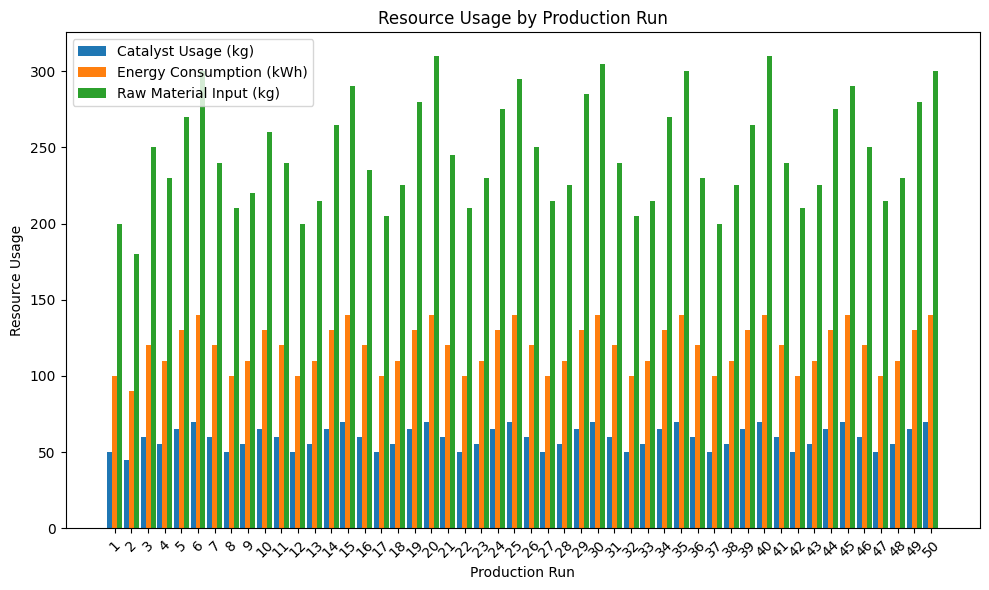

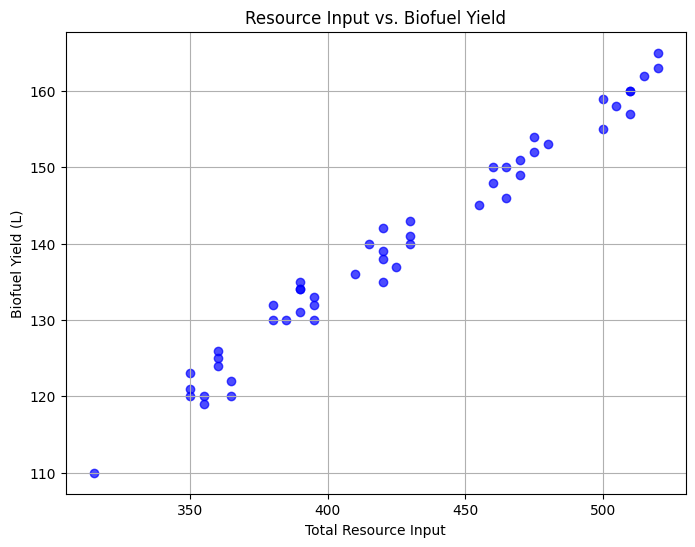

In [4]:
# 4. Visualization
# Bar chart: Catalyst usage, energy consumption, and raw material input for each production run
plt.figure(figsize=(10, 6))
x = np.arange(len(data))
width = 0.3

plt.bar(x - width, data[catalyst_col], width, label='Catalyst Usage (kg)')
plt.bar(x, data[energy_col], width, label='Energy Consumption (kWh)')
plt.bar(x + width, data[material_col], width, label='Raw Material Input (kg)')

plt.xlabel('Production Run')
plt.ylabel('Resource Usage')
plt.title('Resource Usage by Production Run')
plt.xticks(x, data['Production_Run_ID'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot: Relationship between resource input and biofuel yield
plt.figure(figsize=(8, 6))
plt.scatter(data['Total_Resource_Input'], data[yield_col], c='blue', alpha=0.7)
plt.xlabel('Total Resource Input')
plt.ylabel('Biofuel Yield (L)')
plt.title('Resource Input vs. Biofuel Yield')
plt.grid()
plt.show()

### 4. Visualization
Two types of visualizations are generated in this step:
- A **bar chart** to compare the resource usage (catalyst, energy, and raw material) for each production run. The chart helps to visually compare the resource consumption for each run.
- A **scatter plot** to show the relationship between **total resource input** and **biofuel yield**. This plot helps to explore how the total resources used influence the amount of biofuel produced.